## <span style="color:green">Logo </span> 

## <span style="color:green">Import libraries </span>

In [ ]:
import numpy as np
import pandas as pd

# Profiling Report
from pandas_profiling import ProfileReport

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# DateTime
from datetime import datetime

## <span style="color:green">Load data </span> 

In [ ]:
dataset = pd.read_csv('example3.csv', names=['Timestamp', 'Speed_kph', 'MapMatchingError_m', 'ProbeSource'])

#### <span style="color:maroon">Check the first few entries </span>

In [ ]:
dataset.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource
0,2017.11.15_17:19:56,30.25,10,0
1,2017.11.15_17:17:13,7.66,--,1
2,2017.11.15_17:15:27,32.75,--,2
3,2017.11.15_17:15:21,38.25,14,3
4,2017.11.15_17:13:52,29.38,--,1


#### <span style="color:maroon">Statistical information of the dataset </span>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951938 entries, 0 to 951937
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           951938 non-null  object 
 1   Speed_kph           951938 non-null  float64
 2   MapMatchingError_m  951938 non-null  object 
 3   ProbeSource         951938 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 29.1+ MB


In [ ]:
profile = ProfileReport(dataset)

In [ ]:
#profile

### <span style="color:blue">Conclusion: </span>No null entries are present in the dataset

#### <span style="color:maroon">Convert the `Timestamp` string column into timestamp object </span>

In [ ]:
dataset['Timestamp'] = dataset['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d_%H:%M:%S'))

#### <span style="color:maroon">Check if the conversion was successful </span>

In [ ]:
dataset['Timestamp'][0]

Timestamp('2017-11-15 17:19:56')

#### <span style="color:maroon">Q: </span> How many years of data we have?

In [ ]:
dataset['Timestamp'].min()

Timestamp('2015-01-01 00:09:58')

In [ ]:
dataset['Timestamp'].max()

Timestamp('2017-11-15 17:19:56')

### <span style="color:blue">Conclusion: </span> We have around 3 years of data, starting from Jan 1, 2015 till Nov 15, 2017 

#### <span style="color:maroon">Extract Year, Month, Day, Hour from the timestamps </span>
Store the information in individual columns for quick Exploratory Data Analysis 

In [ ]:
dataset['Year'] = dataset['Timestamp'].apply(lambda x : x.date().year)
dataset['Month'] = dataset['Timestamp'].apply(lambda x : x.date().month)
dataset['Day'] = dataset['Timestamp'].apply(lambda x : x.date().day)
dataset['Hour'] = dataset['Timestamp'].apply(lambda x : x.hour)

#### <span style="color:maroon">Check if the additional columns are successfully added </span>

In [ ]:
dataset.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource,Year,Month,Day,Hour
0,2017-11-15 17:19:56,30.25,10,0,2017,11,15,17
1,2017-11-15 17:17:13,7.66,--,1,2017,11,15,17
2,2017-11-15 17:15:27,32.75,--,2,2017,11,15,17
3,2017-11-15 17:15:21,38.25,14,3,2017,11,15,17
4,2017-11-15 17:13:52,29.38,--,1,2017,11,15,17


#### <span style="color:maroon">Check unique entries in the additional columns </span>

In [ ]:
print(sorted(dataset['Year'].unique())) # no. of years in the data

[2015, 2016, 2017]


In [ ]:
print(sorted(dataset['Month'].unique())) # months in a year

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [ ]:
print(sorted(dataset['Day'].unique())) # days in a month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [ ]:
print(sorted(dataset['Hour'].unique())) # hours in a day

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


#### <span style="color:maroon">Convert the `MapMatchingError_m` string column into numerical column </span>

In [ ]:
dataset['MapMatchingError_m'].nunique()

64

#### <span style="color:maroon">Check first five most frequent entries in `MapMatchingError_m` column </span>

In [ ]:
dataset['MapMatchingError_m'].value_counts().head(5)

--    507902
-2     28313
2      26951
-3     26345
-4     26294
Name: MapMatchingError_m, dtype: int64

In [ ]:
dataset['MapMatchingError_m'].unique() # unique entries in the column

array(['10', '--', '14', '16', '6', '15', '17', '13', '7', '12', '9', '1',
       '11', '18', '8', '3', '4', '2', '0', '-2', '-6', '22', '19', '21',
       '23', '5', '-1', '20', '29', '24', '25', '-3', '27', '26', '-31',
       '-21', '-4', '-30', '-19', '-5', '28', '-25', '31', '30', '-11',
       '-7', '-8', '-10', '-16', '-18', '-23', '-13', '-15', '-14', '-22',
       '-9', '-12', '-17', '-26', '-24', '-28', '-20', '-27', '-29'],
      dtype=object)

In [ ]:
dataset['MapMatchingError_m'].nunique() # no. of unique entries in the column

64

In [ ]:
def convert_to_numerical(x):
    if x == '--':
        return np.nan
    return int(x)
dataset['MapMatchingError_m'] = dataset['MapMatchingError_m'].apply(convert_to_numerical)

#### <span style="color:maroon">Check if the `MapMatchingError_m` column is successfully converted</span>

In [ ]:
dataset['MapMatchingError_m'][0]

10.0

In [ ]:
dataset.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource,Year,Month,Day,Hour
0,2017-11-15 17:19:56,30.25,10.0,0,2017,11,15,17
1,2017-11-15 17:17:13,7.66,NaN,1,2017,11,15,17
2,2017-11-15 17:15:27,32.75,NaN,2,2017,11,15,17
3,2017-11-15 17:15:21,38.25,14.0,3,2017,11,15,17
4,2017-11-15 17:13:52,29.38,NaN,1,2017,11,15,17


## <span style="color:green">Exploratory Data Analysis</span>

#### <span style="color:maroon">MapMatching Error Distribution</span>

In [ ]:
dataset['MapMatchingError_m'].describe() # does not include the NaN entries

count    444036.000000
mean          0.374976
std           7.462006
min         -31.000000
25%          -5.000000
50%          -1.000000
75%           4.000000
max          31.000000
Name: MapMatchingError_m, dtype: float64

<AxesSubplot:xlabel='MapMatchingError_m', ylabel='Count'>

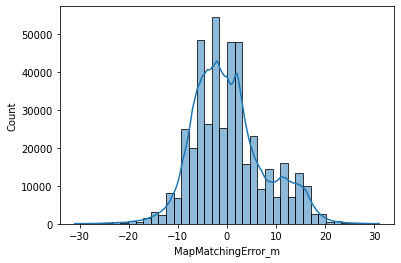

In [ ]:
sns.histplot(dataset['MapMatchingError_m'], kde=True, bins=40)

In [ ]:
dataset['MapMatchingError_m'].max()

31.0

In [ ]:
abs(dataset['MapMatchingError_m']).min()

0.0

### <span style="color:blue">Conclusion: </span> Maximum error (deviation from central line) 31 meters, average error 0.37 meter with standard deviation of 7.46 meters

#### <span style="color:maroon">Correlation of MapMatchingError with ProbeSource</span>

In [ ]:
dataset['MapMatchingError_m'].std()

7.462006387058265

In [ ]:
dataset['ProbeSource'].value_counts().head()

1     291398
2     236943
6     132675
4     132645
15     72777
Name: ProbeSource, dtype: int64

In [ ]:
top_5_probe_list = [1,2,6,4,15]
for probe in top_5_probe_list:
    std_error = dataset[dataset['ProbeSource']==probe]['MapMatchingError_m'].std()
    print(f'Standard deviation of ProbeSource {probe} is {std_error}')

Standard deviation of ProbeSource 1 is 8.344180148263536
Standard deviation of ProbeSource 2 is 7.621398052194044
Standard deviation of ProbeSource 6 is 6.862703516334833
Standard deviation of ProbeSource 4 is 7.777416900729115
Standard deviation of ProbeSource 15 is 6.246143254036163


<AxesSubplot:xlabel='ProbeSource', ylabel='MapMatchingError_m'>

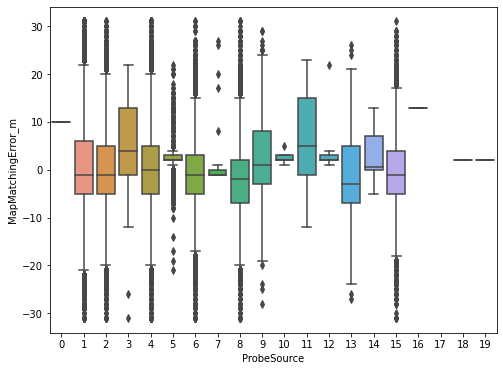

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'ProbeSource', y='MapMatchingError_m', data=dataset)

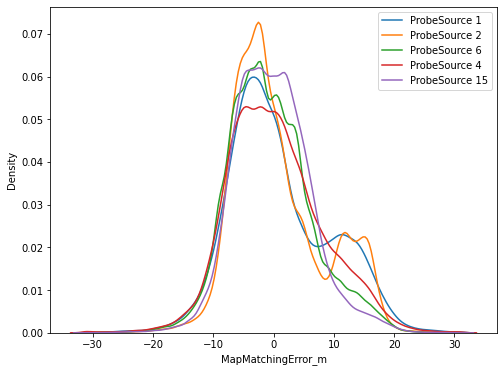

In [ ]:
plt.figure(figsize=(8, 6))
labels = ['ProbeSource 1','ProbeSource 2','ProbeSource 6','ProbeSource 4','ProbeSource 15']
for probe in top_5_probe_list:
    sns.kdeplot(dataset[dataset['ProbeSource'] == probe]['MapMatchingError_m'])
plt.legend(labels)
plt.show()
    

In [ ]:
sns.kdeplot((dataset[(dataset['ProbeSource'] == 1) & () ]['MapMatchingError_m'])

### <span style="color:blue">Conclusion: </span> 
Looking at MapMatchingError_m for the top 5 ProbeSources, the stadard deviations of the MapMatchingError_m for ProbeSource 6 and 15 are slighlty smaller (indicating more precision) than others (ProbeSource 1, 2,4). The standard deviation of MapMatchingError_m for ProbeSource 1 is highest. For ProbeSource 1 and 2, a second peak in the error distribution is observed which could be due to some hardware specifications of the ProbeSource. 

<AxesSubplot:xlabel='ProbeSource', ylabel='MapMatchingError_m'>

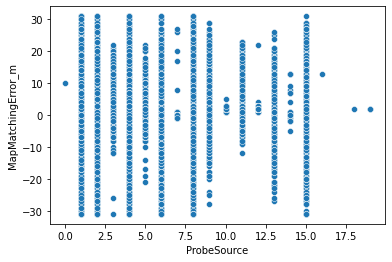

In [ ]:
#sns.scatterplot(x='ProbeSource', y='MapMatchingError_m', data=dataset)

(array([2.5340e+03, 7.8660e+03, 8.1040e+03, 1.2235e+04, 1.9949e+04,
        3.0063e+04, 3.7439e+04, 4.6615e+04, 4.9980e+04, 5.6908e+04,
        6.2613e+04, 5.7609e+04, 5.0560e+04, 3.2395e+04, 1.5695e+04,
        8.2490e+03, 3.9370e+03, 2.0190e+03, 1.0380e+03, 6.4400e+02,
        3.6800e+02, 2.9600e+02, 2.8600e+02, 1.7700e+02, 1.1900e+02,
        7.4000e+01, 4.1000e+01, 1.9000e+01, 1.2000e+01, 1.1000e+01,
        8.0000e+00, 1.0000e+01, 8.0000e+00, 3.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([1.400000e-01, 4.061500e+00, 7.983000e+00, 1.190450e+01,
        1.582600e+01, 1.974750e+01, 2.366900e+01, 2.759050e+01,
        3.151200e+01, 3.543350e+01, 3.935500e+01, 4.327650e+01,
        4.719800e+01, 5.111950e+01, 5.504100e+01, 5.896250e+01,
        6.288400e+01, 6.680550e+01, 7.072700e+01, 7.464850e+01,
        7.857000e+01, 8.249150e+01, 8.641300e+01, 9.033450e+01,
        9.425600e+01, 9.817750e+01, 1.020990e+02, 1.060205e+02,
      

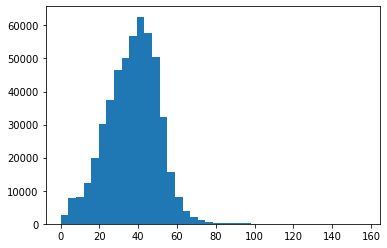

In [ ]:
plt.hist(dataset[dataset['MapMatchingError_m'] == '--']['Speed_kph'], bins=40)

In [ ]:
dataset[dataset['MapMatchingError_m'] == '--']['Speed_kph'].mean()

37.197465121224724

In [ ]:
dataset[dataset['MapMatchingError_m'] == '--']['ProbeSource'].value_counts()

1     191518
2     121152
4      79506
6      46855
5      27622
15     23366
8      13470
3       1303
7       1234
9        671
13       519
11       400
10       148
12        74
18        50
14        10
17         2
19         2
Name: ProbeSource, dtype: int64

In [ ]:
dataset[(dataset['MapMatchingError_m'] == '--') & (dataset['ProbeSource'] == 1)]['Speed_kph'].mean()

33.75837675832023

In [ ]:
dataset[(dataset['MapMatchingError_m'] == '--') & (dataset['ProbeSource'] == 2)]['Speed_kph'].mean()

40.142506520734266

In [ ]:
dataset[(dataset['MapMatchingError_m'] == '--') & (dataset['ProbeSource'] == 4)]['Speed_kph'].mean()

36.15953424898725

In [ ]:
dataset[(dataset['MapMatchingError_m'] == '--') & (dataset['ProbeSource'] == 5)]['Speed_kph'].mean()

33.99999601766709

In [ ]:
dataset['Speed_kph'].max()

157.0

In [ ]:
dataset['Speed_kph'].mean()

32.817462933509574

In [ ]:
dataset['Speed_kph'].min()

0.02

## How many years of data we have?

In [ ]:
dataset.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource,Year,Month,Day,Hour,Minute
0,2017-11-15 17:19:56,30.25,10,0,2017,11,15,17,19
1,2017-11-15 17:17:13,7.66,--,1,2017,11,15,17,17
2,2017-11-15 17:15:27,32.75,--,2,2017,11,15,17,15
3,2017-11-15 17:15:21,38.25,14,3,2017,11,15,17,15
4,2017-11-15 17:13:52,29.38,--,1,2017,11,15,17,13


In [ ]:
x = dataset.groupby(['Year','Month'])['Speed_kph'].mean()
dataset_wide = x.unstack()

In [ ]:
dataset_wide.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,37.596665,38.071406,38.209192,38.682002,39.438296,38.136374,38.125716,38.151293,38.922135,39.121362,38.573956,38.533171
2016,38.898264,39.486380,39.252068,38.104766,37.159062,38.662235,39.223304,39.149617,38.365117,35.014846,27.115631,27.775758
2017,28.840061,29.647370,28.926671,28.599816,28.671089,28.279778,28.752023,26.095378,24.156497,24.238872,23.664653,NaN


<AxesSubplot:ylabel='Speed_kph'>

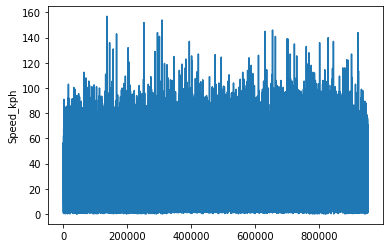

In [ ]:
sns.lineplot(data=dataset['Speed_kph'])

In [ ]:
resampled = dataset["Speed_kph"].resample("A").mean() 
sns.lineplot(data = resampled)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
df = pd.DataFrame(dataset[dataset['Year'] == 2015].groupby(by='Month')['Speed_kph'].mean())

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,Speed_kph
Month,
1,37.596665
2,38.071406
3,38.209192
4,38.682002
5,39.438296
6,38.136374
7,38.125716
8,38.151293
9,38.922135


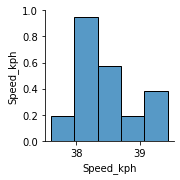

In [ ]:
sns.pairplot(df)

In [ ]:
np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
type(dataset[dataset['Year'] == 2015].groupby(by='Month')['Speed_kph'].mean())

pandas.core.series.Series

In [ ]:
y = dataset[dataset['Year'] == 2015].groupby(by='Month')['Speed_kph'].mean()

In [ ]:
y

Month
1     37.596665
2     38.071406
3     38.209192
4     38.682002
5     39.438296
6     38.136374
7     38.125716
8     38.151293
9     38.922135
10    39.121362
11    38.573956
12    38.533171
Name: Speed_kph, dtype: float64

In [ ]:
# 2017 monthly speed average

dataset[dataset['Timestamp'].apply(extract_year) == 2015].groupby(dataset['Timestamp'].apply(extract_month))['Speed_kph'].mean()

Timestamp
April        38.682002
August       38.151293
December     38.533171
February     38.071406
January      37.596665
July         38.125716
June         38.136374
March        38.209192
May          39.438296
November     38.573956
October      39.121362
September    38.922135
Name: Speed_kph, dtype: float64

In [ ]:
dataset['Year'].unique()

array([2017, 2016, 2015])

In [ ]:
dataset['Timestamp'].min()

Timestamp('2015-01-01 00:09:58')

In [ ]:
dataset['Timestamp'].max()

Timestamp('2017-11-15 17:19:56')

## Exploratory data analysis

In [ ]:
#sns.histplot(dataset['Speed_kph'])
#sns.histplot(dataset['MapMatchingError_m'])
#sns.histplot(dataset['Timestamp'])
#sns.histplot(dataset['ProbeSource'])
#sns.pairplot(dataset)

In [ ]:
dataset.head()

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource,Year,Month,Day,Hour,Minute
0,2017-11-15 17:19:56,30.25,10,0,2017,11,15,17,19
1,2017-11-15 17:17:13,7.66,--,1,2017,11,15,17,17
2,2017-11-15 17:15:27,32.75,--,2,2017,11,15,17,15
3,2017-11-15 17:15:21,38.25,14,3,2017,11,15,17,15
4,2017-11-15 17:13:52,29.38,--,1,2017,11,15,17,13


<AxesSubplot:xlabel='Month', ylabel='Speed_kph'>

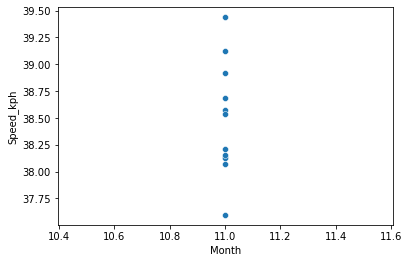

In [ ]:
sns.scatterplot(x=dataset['Month'],y=dataset[dataset['Year'] == 2015].groupby(by='Month')['Speed_kph'].mean())

In [ ]:
data = pd.DataFrame(dataset['Speed_kph'], dataset['Timestamp'], columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

<AxesSubplot:xlabel='Timestamp'>

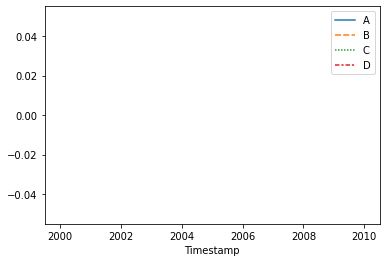

In [ ]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## Q1: What was the average speed when the car could not be located (no MapMatchingError_m)? Trying to find out if the high speed was a reason for missing location data (no MapMatchingError_m)

In [ ]:
dataset['MapMatchingError_m'][1]

'--'

In [ ]:
dataset['MapMatchingError_m'].unique()

array(['10', '--', '14', '16', '6', '15', '17', '13', '7', '12', '9', '1',
       '11', '18', '8', '3', '4', '2', '0', '-2', '-6', '22', '19', '21',
       '23', '5', '-1', '20', '29', '24', '25', '-3', '27', '26', '-31',
       '-21', '-4', '-30', '-19', '-5', '28', '-25', '31', '30', '-11',
       '-7', '-8', '-10', '-16', '-18', '-23', '-13', '-15', '-14', '-22',
       '-9', '-12', '-17', '-26', '-24', '-28', '-20', '-27', '-29'],
      dtype=object)

In [ ]:
def set_no_error_to_999(x):
    if x == '--':
        return 999
    return int(x)
dataset['MapMatchingError_m'] = dataset['MapMatchingError_m'].apply(set_no_error_to_999)

In [ ]:
dataset['MapMatchingError_m'][0]

10

In [ ]:
dataset[dataset['MapMatchingError_m'] == 999]['Speed_kph'].mean()

37.197465121224724

In [ ]:
dataset[dataset['MapMatchingError_m'] == 999]['Speed_kph'].min()

0.14

In [ ]:
dataset[dataset['MapMatchingError_m'] == 999]['Speed_kph'].max()

157.0

(array([3.5800e+02, 1.0240e+03, 2.5180e+03, 3.1450e+03, 3.3550e+03,
        3.2630e+03, 3.2890e+03, 3.2320e+03, 4.8150e+03, 5.7400e+03,
        7.3440e+03, 8.0190e+03, 1.0453e+04, 1.0989e+04, 1.3207e+04,
        1.3520e+04, 1.5937e+04, 1.6358e+04, 1.8549e+04, 1.9690e+04,
        2.0741e+04, 1.8756e+04, 2.0328e+04, 2.5225e+04, 2.1838e+04,
        2.3014e+04, 2.3635e+04, 2.8555e+04, 2.2965e+04, 2.2053e+04,
        2.4178e+04, 1.8872e+04, 1.4975e+04, 1.3199e+04, 1.1731e+04,
        7.5930e+03, 5.6140e+03, 4.5150e+03, 3.7220e+03, 2.5000e+03,
        1.7790e+03, 1.7680e+03, 9.4200e+02, 8.6600e+02, 6.0100e+02,
        4.3100e+02, 3.8800e+02, 3.3300e+02, 3.2300e+02, 2.0700e+02,
        1.7700e+02, 1.3700e+02, 1.4200e+02, 1.1100e+02, 9.7000e+01,
        1.1100e+02, 1.5200e+02, 7.7000e+01, 5.9000e+01, 6.4000e+01,
        4.7000e+01, 4.1000e+01, 4.1000e+01, 3.8000e+01, 2.6000e+01,
        1.9000e+01, 1.1000e+01, 1.4000e+01, 1.0000e+01, 6.0000e+00,
        6.0000e+00, 5.0000e+00, 7.0000e+00, 5.00

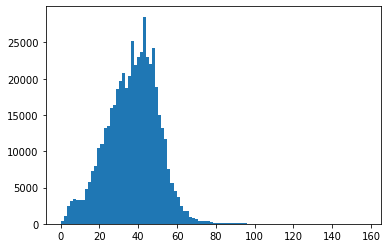

In [ ]:
plt.hist(dataset[dataset['MapMatchingError_m'] == 999]['Speed_kph'], bins=100)

## Q2: Which service provider did encounter most missing values of map matching error?

In [ ]:
dataset['ProbeSource'].value_counts()

1     291398
2     236943
6     132675
4     132645
15     72777
5      41134
8      27145
3       5994
7       4936
9       2689
13      1542
11      1258
10       408
12       303
18        51
14        32
19         4
17         2
16         1
0          1
Name: ProbeSource, dtype: int64

In [ ]:
dataset[dataset['MapMatchingError_m'] == 999]['ProbeSource'].value_counts()

1     191518
2     121152
4      79506
6      46855
5      27622
15     23366
8      13470
3       1303
7       1234
9        671
13       519
11       400
10       148
12        74
18        50
14        10
17         2
19         2
Name: ProbeSource, dtype: int64

In [ ]:
((dataset[dataset['MapMatchingError_m'] == 999]['ProbeSource'].value_counts())/(dataset['ProbeSource'].value_counts())).sort_values(ascending=False)

17    1.000000
18    0.980392
5     0.671513
1     0.657239
4     0.599389
2     0.511313
19    0.500000
8     0.496224
10    0.362745
6     0.353156
13    0.336576
15    0.321063
11    0.317965
14    0.312500
7     0.250000
9     0.249535
12    0.244224
3     0.217384
0          NaN
16         NaN
Name: ProbeSource, dtype: float64

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 0)]

,Timestamp,Speed_kph,MapMatchingError_m,ProbeSource,Year,Month,Day,Hour,Minute


## Q3: What was the average speed when the top 4 service providers from Q2 was used? Trying to find out if the high speed was a reason for missing location data (no MapMatchingError_m)

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 17)]['Speed_kph']

69604     22.75
659027    10.00
Name: Speed_kph, dtype: float64

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 18)]['Speed_kph'].mean()

46.5826

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 5)]['Speed_kph'].mean()

33.99999601766709

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 1)]['Speed_kph'].mean()

33.75837675832023

In [ ]:
dataset[(dataset['MapMatchingError_m'] == 999) & (dataset['ProbeSource'] == 4)]['Speed_kph'].mean()

36.15953424898725

## Q4: What is the general maximum speed on this road segment?

In [ ]:
dataset[dataset['Year'] == 2015]['Speed_kph'].max()

144.0

In [ ]:
dataset[dataset['Year'] == 2015]['Speed_kph'].min()

0.02

In [ ]:
dataset[dataset['Year'] == 2015]['Speed_kph'].mean()

38.499017352562255

In [ ]:
dataset[dataset['Year'] == 2016]['Speed_kph'].max()

146.0

In [ ]:
dataset[dataset['Year'] == 2016]['Speed_kph'].min()

0.09

In [ ]:
dataset[dataset['Year'] == 2016]['Speed_kph'].mean()

36.48402726055965

In [ ]:
dataset[dataset['Year'] == 2017]['Speed_kph'].max()

157.0

In [ ]:
dataset[dataset['Year'] == 2017]['Speed_kph'].min()

0.02

In [ ]:
dataset[dataset['Year'] == 2017]['Speed_kph'].mean()

27.357126267111624

## Q7: What is the central tendency and distribution of speed in 2015/2016/2017? (Box Plot)

<AxesSubplot:xlabel='Month', ylabel='Speed_kph'>

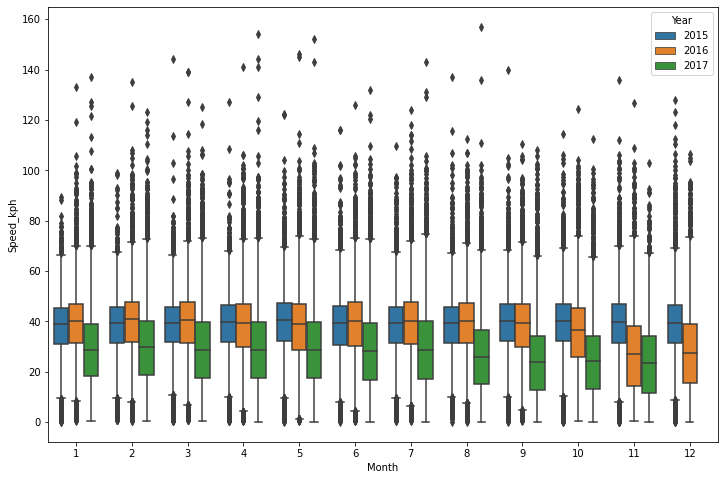

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Speed_kph', data=dataset, hue='Year')

## Q10:What are the average speed per month in 2015? 

<AxesSubplot:xlabel='Month', ylabel='Speed_kph'>

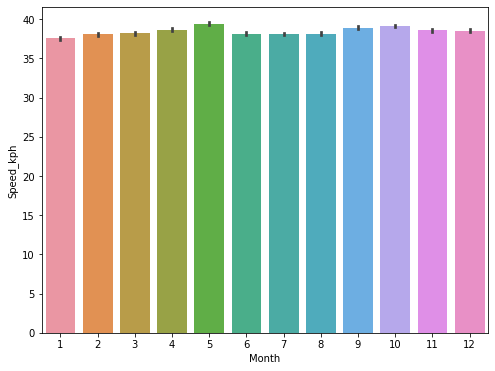

In [ ]:
# barplot
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Month', y='Speed_kph', data = dataset[dataset['Year'] == 2015])

<AxesSubplot:xlabel='Month', ylabel='Speed_kph'>

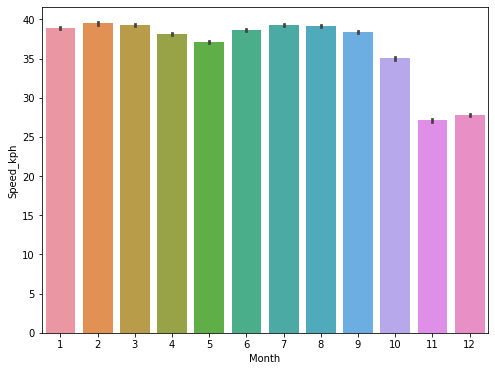

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Month', y='Speed_kph', data = dataset[dataset['Year'] == 2016])

<AxesSubplot:xlabel='Month', ylabel='Speed_kph'>

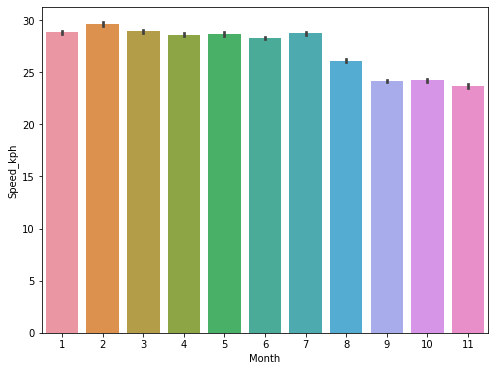

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Month', y='Speed_kph', data = dataset[dataset['Year'] == 2017])

## Q13: Historic Speeds per Month in 2015? (Line Plot)

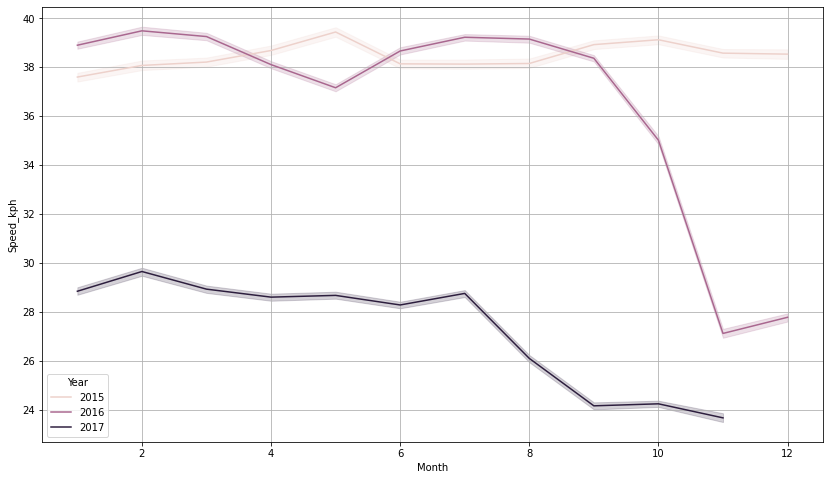

In [ ]:
# plotting with confidence intervals 
plt.figure(figsize=(14, 8))
sns.lineplot(x="Month", y="Speed_kph", data=dataset, hue='Year')
plt.grid()

## Q17: Historic Speeds per Day in 2015 (Line Plot)

In [ ]:
dataset['Day']

0         15
1         15
2         15
3         15
4         15
          ..
951933     1
951934     1
951935     1
951936     1
951937     1
Name: Day, Length: 951938, dtype: int64

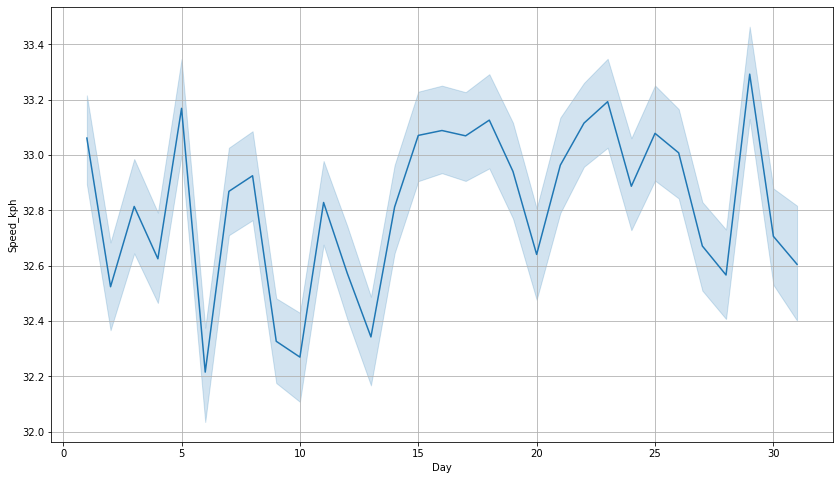

In [ ]:
# plotting with confidence intervals 
plt.figure(figsize=(14, 8))
sns.lineplot(x="Day", y="Speed_kph", data=dataset)
plt.grid()

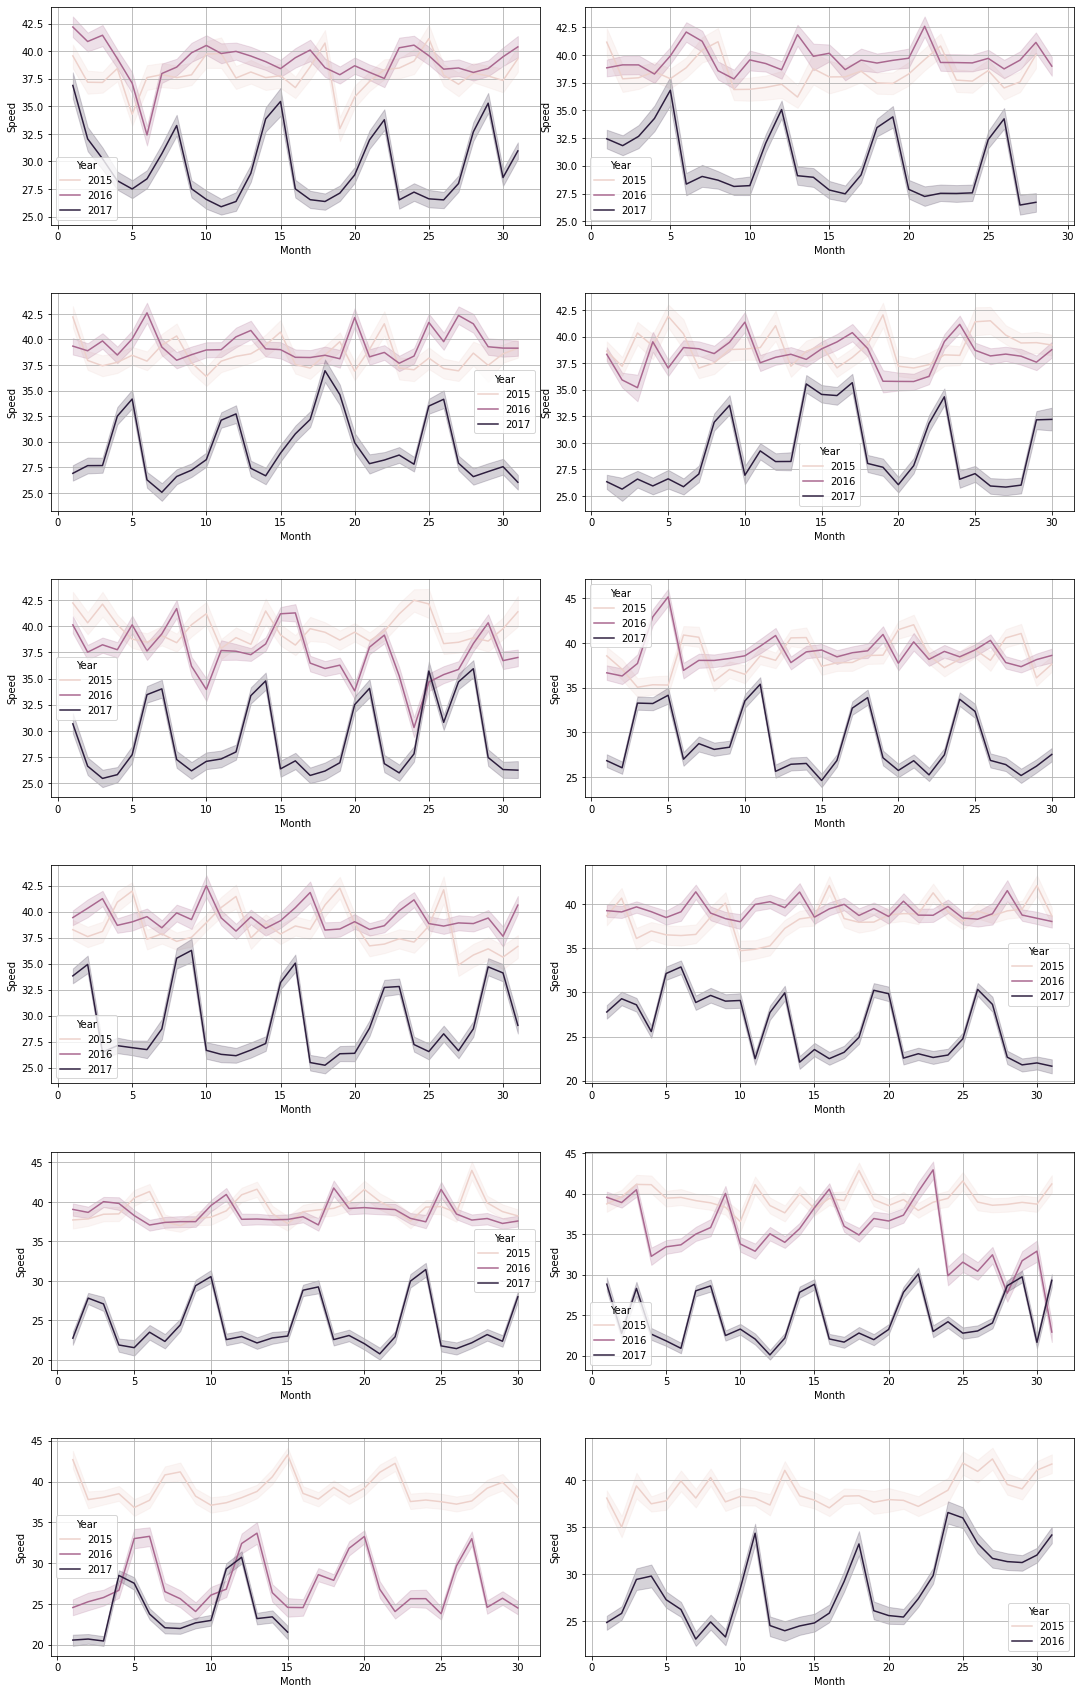

In [ ]:
# plotting with confidence intervals 
#plt.figure(figsize=(14, 8))
#sns.lineplot(x="Day", y="Speed_kph", data=dataset[dataset['Month'] == ])
#plt.grid()



plt.figure(figsize=(15, 24))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i in range(1,13):
    plt.subplot(6, 2, i)
    sns.lineplot(x="Day", y="Speed_kph", data=dataset[dataset['Month'] == i], hue='Year')
    #company['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
    #dataset['Speed_kph'].plot(label='Speed per km/hour')
    plt.ylabel('Speed')
    plt.xlabel('Month')
    plt.grid()
    #plt.title(f"Closing Price and its Moving Avg. for {company_names[i]}")
    
plt.tight_layout()

In [ ]:
#plt.figure(figsize=(12, 8))
# plotting wideform data
#sns.lineplot(x="Year", y="Speed_kph", data=dataset, hue="Month", palette="Dark2")

In [ ]:
# plotting moving average (window = N past observations)
#ma = dataset[dataset['Year'] == 2015]["Speed_kph"].rolling(window=30).mean() 
#sns.lineplot(data = ma)
#plt.figure(figsize=(12, 8))
#dataset['Speed_kph'].rolling(window=30).mean().plot(label='30 Day Avg')